In [1]:
import numpy as np
from scipy.spatial import Delaunay
import networkx as nx
import pylab as plt

from simplicial_kuramoto import SimplicialComplex, integrate_edge_kuramoto, plotting

In [37]:
def get_grid_partial(n_node,frac):

    x = np.linspace(0, 1, n_node)
    
    points = []
    for i in range(n_node):
        for j in range(n_node):
            points.append([x[j], x[i]])

    tri = Delaunay(points)

    edge_list = []
    edge_list_diag = []
    
    for t in tri.simplices:
        if((t[0]==t[1]+1) or (t[0]==t[1]-1) or (t[0]==t[1]+n_node) or (t[0]==t[1]-n_node)):
            edge_list.append([t[0], t[1]])
        else:
            edge_list_diag.append([t[0], t[1]])
        if((t[0]==t[2]+1) or (t[0]==t[2]-1) or (t[0]==t[2]+n_node) or (t[0]==t[2]-n_node)):
            edge_list.append([t[0], t[2]])
        else:
            edge_list_diag.append([t[0], t[2]])
        if((t[1]==t[2]+1) or (t[1]==t[2]-1) or (t[1]==t[2]+n_node) or (t[1]==t[2]-n_node)):
            edge_list.append([t[1], t[2]])
        else:
            edge_list_diag.append([t[1], t[2]])

    for t in edge_list_diag[0:int(np.round(len(edge_list_diag)*frac))]:
        edge_list.append(t)
    
    graph = nx.Graph()
    graph.add_nodes_from(np.arange(len(points)))    
    graph.add_edges_from(edge_list)
    return graph, points

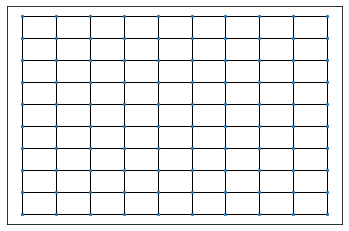

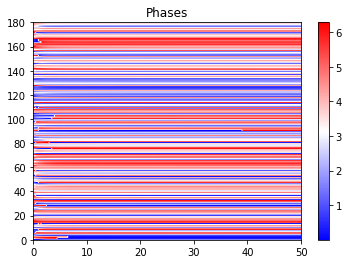

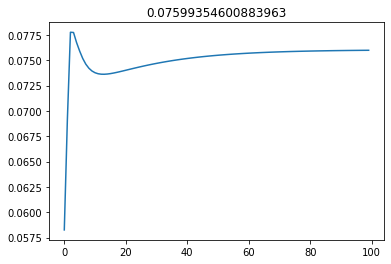

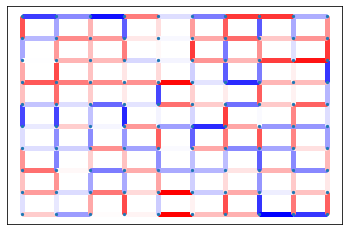

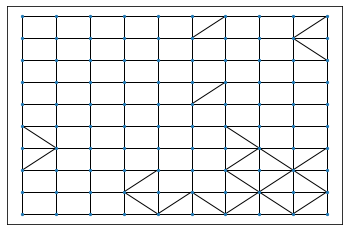

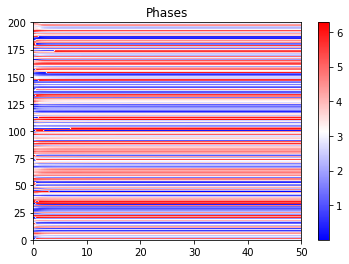

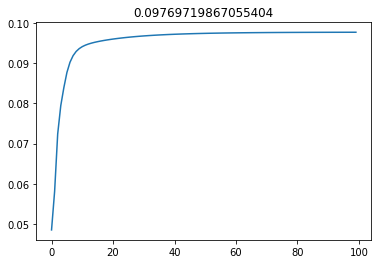

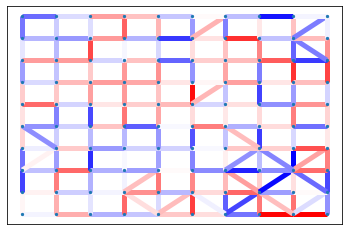

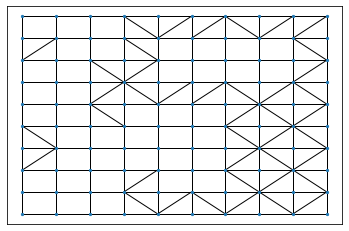

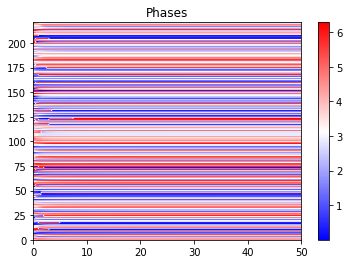

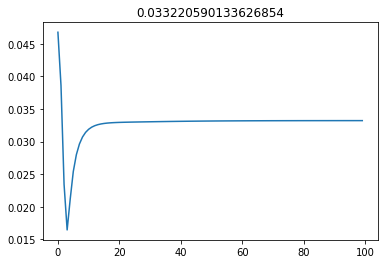

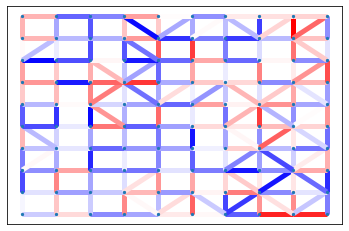

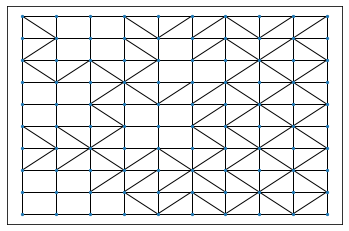

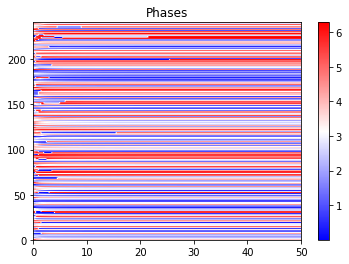

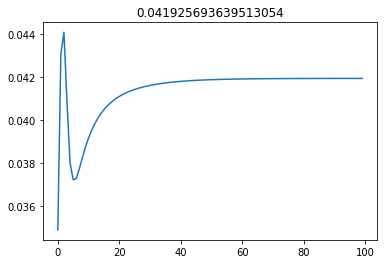

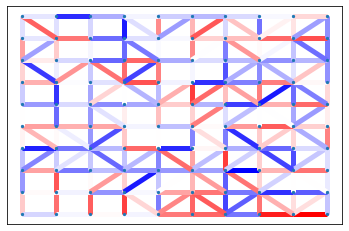

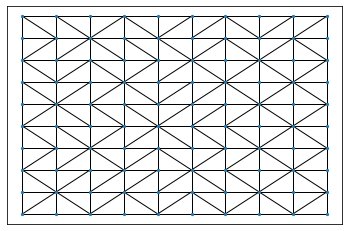

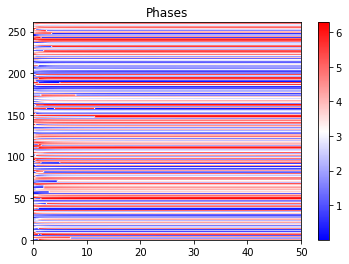

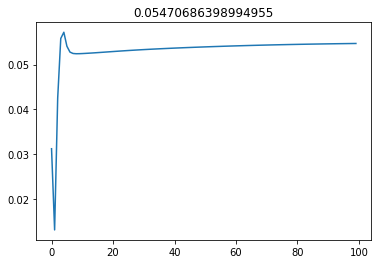

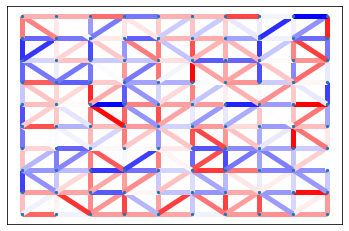

In [45]:
n_node=10
n_frac=5

for frac in np.linspace(0,1,n_frac):
    graph, points = get_grid_partial(n_node,frac)
#     edge_flip = 32

    plt.figure()
    nx.draw_networkx_nodes(graph, pos=points, node_size=5)
    nx.draw_networkx_edges(graph, pos=points)
#     nx.draw_networkx_edges(
#         graph,
#         edgelist=[list(graph.edges())[edge_flip]],
#         pos=points,
#         edge_color="r",
#         width=2,
#     )
    labels = dict(((u, v), d) for d, (u, v) in enumerate(graph.edges))
#     nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)
    # plt.savefig("delaunay_graph.png")

    np.random.seed(0)
    initial_phase = np.random.uniform(0, 2 * np.pi, len(graph.edges))
#     initial_phase = np.zeros(len(graph.edges))
#     initial_phase[edge_flip] = 1.0

    t_max = 50
    n_t = 100

    complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)

    edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)
    plotting.plot_edge_kuramoto(edge_result)
    # plt.savefig("phases_no_faces.png")

    plotting.plot_order_parameter(edge_result.y, return_op=False, plot=True)
    
    plt.figure()
    nx.draw_networkx_nodes(graph, pos=points, node_size=5)
    nx.draw_networkx_edges(
        graph,
        pos=points,
        edge_color=edge_result.y[:, -1],
        edge_cmap=plt.get_cmap("bwr"),
        width=5,
        edge_vmin=np.min(edge_result.y),
        edge_vmax=np.max(edge_result.y),
    )
#     nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)
    # plt.savefig("large_time_no_faces.png")

In [46]:
plt.close('all')